# Clase 21/04/2025

## Metodos Analiticos

Se usan para el manejo de grandes cantidades de datos y las busqueda de soluciones exactas.
La desventaja es que no siempre es posible obtener una solucion analitica en ecuaciones mas complejas o no lineales.

**Ejemplo:**

Mediante el metodo analitico se podria resolver ecuaciones cuadraticas aplicando factorizacion, T.C.P o la formula general.

In [ ]:
#Resolucion de una ecuacion cuadratica mediante la formula general
import math

def formula_general(a, b, c):
    discriminante = b**2 - 4*a*c

    if discriminante >= 0:
        x1 = (-b + math.sqrt(discriminante)) / (2*a)
        x2 = (-b - math.sqrt(discriminante)) / (2*a)

        print(f"Las soluciones son x1 = {x1} y x2 = {x2}")
    else:
        print("El sistema no tiene soluciones reales")

#Ecuacion a resolver
print("x^2 + 2x - 3 = 0")

#Llamada a la funcion 
formula_general(1, 2, -3)


## Metodos Numericos

Se usan aproximaciones para encontrar soluciones cuando no se puede resolver analiticamente, por lo tanto, el resultado puede contener algun tipo de error.

**Ejemplo:**

Se podria aplicar metodos como el de biseccion o Newton-Raphson para encontrar raices.  

## Exactitud vs Precision  

* **Exactitud:** Es que tan cerca esta el reusltado del valor real o verdadero.

* **Precision:** Se refiere a que tan consistentes son los resultados obtenidos.

![Exactitud y Precision](https://www.wikiversus.com/blog/diferencia-entre-precision-y-exactitud/img/exactitud-vs-precision-featured_hu401876fdba8597e9d7c0132daf7f3ad1_74313_1200x900_fill_lanczos_center_2.png)

## Tipos de Errores

* **Error de corte o truncamiento:** Se produce cuando se le quitan valores a un numero decimal.
**Ejemplo:**
Pi con sus primeros 15 decimales:
Pi = 3.141592653589793
Pi con error de truncamiento y 4 cifras significativas:
Pi = 3.141

In [ ]:
#Definicion de la constante Pi con 15 decimales como float y String
constante_pi = 3.141592653589793
constante_pi_string = str(constante_pi)

#Calculo de la constante Pi con error de truncamiento y 4 cifras significativas
constante_pi_truncamiento = ""
contador = 0
while contador < 5:
        constante_pi_truncamiento += constante_pi_string[contador]
        contador += 1

print("Constante con error de truncamiento: " + constante_pi_truncamiento)

* **Error de redondeo:** Se produce cuando se redondean los valores.
**Ejemplo:**
Pi con sus primeros 15 decimales:
Pi = 3.141592653589793
Pi con error de redondeo y 4 cifras significativas:
Pi = 3.142

In [ ]:
#Definicion de la constante Pi con 15 decimales como float 
constante_pi = 3.141592653589793

#Calculo de la constante Pi con error de redondeo y 4 cifras significativas
constante_pi_redondeo = f"{constante_pi:.3f}"

print("Constante con error de redondeo: " + constante_pi_redondeo)

* **Error de desbordamiento:** Se produce al superar el limite para almacenar numeros.
**Ejemplo en Python:**

In [ ]:
#Modulo sys que da acceso a la informacion del sistema
import sys

# Tamaño máximo de un entero (en Python  es ilimitado, depende de la RAM)
print(f"Máximo valor de int: Ilimitado (limitado solo por la memoria)")

#Tiene un limite fijo porque se basa en la representacion IEEE 754
#Pasado los 15 digitos pueden existir errores de redondeo debido a como la representacion
#IEEE 754 maneja los numeros flotantes
print(f"Máximo valor de float: {sys.float_info.max}")
print(f"Precisión decimal de float: {sys.float_info.dig} dígitos")
a = 1e309
print(a)  # si se excede se obtiene infinito

# Tamaño máximo de estructuras como listas o strings, devuelve el mayor indice posible que se puede usar en una lista
# Solo si se tiene suficiente memoria, sino, se obtiene un "Memory Error"
print(f"Tamaño máximo de lista/str (en teoría): {sys.maxsize}")

## Representacion Numerica del IEEE 754

La representacion IEEE 754 es una forma de representar numeros de coma flotante que no pueden ser representados de forma exacta con un numero fijo.

* **Signo:** Un bit que indica si el numero es positivo o negativo (0 para negativo y 1 para positivo)

* **Exponente:** Es la representacion de un numero entero que determina cuanto hay que mover el punto decimal para obtener el numero correcto.

* **Mantisa:** La parte que contiene los digitos significativos de la representacion.

In [ ]:
# Función para convertir la parte entera de un número decimal a binario
def calcular_entero_binario(numero):
    parte_entera_binario = ""
    
    # Mientras el número sea mayor que 0, se divide entre 2 y se obtiene el residuo
    while numero > 0:
        residuo = numero % 2
        parte_entera_binario = str(residuo) + parte_entera_binario  # Se construye el binario desde el final
        numero = numero // 2  # División entera entre 2
    
    return parte_entera_binario

# Función para convertir la parte decimal a binario con una cantidad fija de bits (mantisa)
def calcular_decimal_binario(numero, tamaño_mantisa):
    lista_numero_entero_decimal = [0] * tamaño_mantisa  # Inicializa lista para guardar los bits
    i = 0
    
    # Mientras haya parte decimal y no se alcance el tamaño de mantisa
    while numero > 0 and i < tamaño_mantisa:
        parte_entera_decimal = str(numero * 2)  # Multiplica la parte decimal por 2
        
        lista_temporal_entero_decimal = parte_entera_decimal.split(".")  # Separa parte entera y decimal
        
        lista_numero_entero_decimal[i] = int(lista_temporal_entero_decimal.pop(0))  # Guarda el bit correspondiente
        
        # Convierte nuevamente la parte decimal para el siguiente ciclo
        numero = float("0." + lista_temporal_entero_decimal.pop(0))
        i += 1
        
    return lista_numero_entero_decimal

# Entrada del número a convertir
numero = input("Ingrese el numero: ")
numero_string = str(numero)

# Determina el bit de signo: 0 si positivo, 1 si negativo
if(numero_string[0] == "+" or numero_string[0] != "-"):
    signo = 0
    numero_string = numero_string.replace("+", "")
else:
    signo = 1
    numero_string = numero_string.replace("-", "")

# Separa el número ingresado en parte entera y decimal
lista_numero = numero_string.split(".")
parte_entera = int(lista_numero[0])
parte_decimal_string = lista_numero[1]
parte_decimal = float("0." + parte_decimal_string)

# Selección del tipo de conversión: 32 o 64 bits
numero_opcion = int(input("""Ingrese el numero de la opcion:
1. Conversion a 32 bits.
2. Conversion a 64 bits
"""))

# Define los valores de mantisa y exponente base según la opción seleccionada
if numero_opcion == 1:
    mantisa = 23 
    exponente = 126  # Sesgo (bias) para 32 bits es 127, pero luego se resta 1 al calcular longitud
elif numero_opcion == 2:
    mantisa = 52 
    exponente = 1022  # Bias para 64 bits es 1023, pero también se ajusta restando 1
else:
    print("Opcion no valida")

# Calcula el exponente sumando el sesgo al número de bits de la parte entera menos 1
exponente_numero = len(calcular_entero_binario(parte_entera)) + exponente

# Convierte el exponente a binario
exponente_numero_binario = calcular_entero_binario(exponente_numero)

# Convierte la parte entera a binario
entero_binario = calcular_entero_binario(parte_entera)

# Convierte la parte decimal a binario con la longitud de la mantisa
decimal_binario = calcular_decimal_binario(parte_decimal, mantisa)

# Se elimina el primer bit (que es 1 implícito en IEEE) para iniciar la mantisa
mantisa_primera = entero_binario[1:]

# Se arma la mantisa combinando la parte entera y la parte decimal
mantisa_final = mantisa_primera
for bit in decimal_binario:
    mantisa_final += str(bit)

# Se recorta la mantisa al tamaño requerido
mantisa_final = mantisa_final[:mantisa]

# Salida final con el número codificado en formato IEEE-754
print(f"El numero {numero_string} en IEEE-754: ")
print(f"Signo: {signo}")
print(f"Exponente: {exponente_numero_binario}")
print(f"Mantisa: {mantisa_final}")


## Calculo de error

* **Error real:** Es la diferencia entre el valor real y el valor obtenido.

In [ ]:
#Definicion de la constante Pi con 15 decimales como float 
constante_pi = 3.141592653589793

#Calculo de la constante Pi con error de redondeo y 4 cifras significativas
constante_pi_redondeo = f"{constante_pi:.3f}"
print("Constante con error de redondeo: " + constante_pi_redondeo)

#Funcion para el calculo del error real.
def error_real (valor_verdadero, valor_aproximado):
    return valor_verdadero - valor_aproximado

print(f"Error Real de la constante con error de redondeo: {error_real(constante_pi, float(constante_pi_redondeo))}")

* **Error absoluto:** Es la magnitud del error real.

In [ ]:
#Definicion de la constante Pi con 15 decimales como float 
constante_pi = 3.141592653589793

#Calculo de la constante Pi con error de redondeo y 4 cifras significativas
constante_pi_redondeo = f"{constante_pi:.3f}"
print("Constante con error de redondeo: " + constante_pi_redondeo)

#Funcion para el calculo del error absoluto.
def error_absoluto (valor_verdadero, valor_aproximado):
    return abs(valor_verdadero - valor_aproximado)

print(f"Error Absoluto de la constante con error de redondeo: {error_absoluto(constante_pi, float(constante_pi_redondeo))}")

* **Error relativo:** Es una medida proporcional entre el error absoluto y el verdadero.

In [ ]:
#Definicion de la constante Pi con 15 decimales como float 
constante_pi = 3.141592653589793

#Calculo de la constante Pi con error de redondeo y 4 cifras significativas
constante_pi_redondeo = f"{constante_pi:.3f}"
print("Constante con error de redondeo: " + constante_pi_redondeo)

#Funcion para el calculo del error relativo.
def error_relativo (valor_verdadero, valor_aproximado):
    if valor_verdadero != 0:
        return (abs((valor_verdadero - valor_aproximado)/valor_verdadero))
    else:
        print("No se puede dividir para 0")

print(f"Error Relativo de la constante con error de redondeo: {error_relativo(constante_pi, float(constante_pi_redondeo))}")

* **Error relativo porcentual:** Es el error relativo expresado como porcentaje.

In [ ]:
#Definicion de la constante Pi con 15 decimales como float 
constante_pi = 3.141592653589793

#Calculo de la constante Pi con error de redondeo y 4 cifras significativas
constante_pi_redondeo = f"{constante_pi:.3f}"
print("Constante con error de redondeo: " + constante_pi_redondeo)

#Funcion para el calculo del error relativo porcentual.
def error_porcentual (valor_verdadero, valor_aproximado):
    if valor_verdadero != 0:
        return (abs((valor_verdadero - valor_aproximado)/valor_verdadero))*100
    else:
        print("No se puede dividir para 0")

print(f"Error Relativo Porcentual de la constante con error de redondeo: {error_porcentual(constante_pi, float(constante_pi_redondeo))}")

# Clase 22/04/2025

## Aritmetica de digitos finitos / de computador

Es la forma en que una computadora realiza operaciones matematicas usando un numero limitado de digitos. 
Para trabajar con ella se nos debe especificar el numero de cifras significativas y el tipo de error.

![operaciones_aritmetica_computador](aritmeticadecomputador.png)

In [9]:
def error_real (valor_verdadero, valor_aproximado):
    return valor_verdadero - valor_aproximado

def error_absoluto (valor_verdadero, valor_aproximado):
    return abs(valor_verdadero - valor_aproximado)

def error_relativo (valor_verdadero, valor_aproximado):
    if valor_verdadero != 0:
        return (abs((valor_verdadero - valor_aproximado)/valor_verdadero))
    else:
        print("No se puede dividir para 0")

def error_porcentual (valor_verdadero, valor_aproximado):
    if valor_verdadero != 0:
        return (abs((valor_verdadero - valor_aproximado)/valor_verdadero))*100
    else:
        print("No se puede dividir para 0")

variable_x = input("Ingrese el valor de x: ")
variable_x_string = str(variable_x)
variable_x_float = float(variable_x)

variable_y = input("Ingrese el valor de y: ")
variable_y_string = str(variable_y)
variable_y_float = float(variable_y)

numero_opcion = int(input("""Ingrese el numero de la opcion:
1. Trabajar los valores con redondeo.
2. Trabajar los valores con truncamiento.
"""))

decimales = int(input("Ingrese la cantidad de decimales para trabajar: "))

if numero_opcion == 1:
    x_variable = round(variable_x_float, int(decimales))
    y_variable = round(variable_y_float, int(decimales))
else:

    lista_variable_x = variable_x_string.split(".")
    lista_variable_y = variable_y_string.split(".")
    
    parte_decimal_x = lista_variable_x[1]
    parte_decimal_y = lista_variable_y[1]
    
    if (len(parte_decimal_x) >= decimales):
        x_variable = ""
        contador = 0
        while contador <= int(decimales) + 1:
            x_variable += variable_x_string[contador]
            contador += 1
    else:
        x_variable = variable_x_float
    
    if (len(parte_decimal_y) >= decimales):
        y_variable = ""
        contador = 0
        while contador <= int(decimales) + 1:
            y_variable += variable_y_string[contador]
            contador += 1
    else:
        y_variable = variable_y_float
    
        
# print(variable_x_redondeo)
# print(variable_y_redondeo)

print(x_variable)
print(y_variable)

opcion = input ("Seleccione la opcion ")

match opcion:
    case "1":
        valor_real = variable_x_float + variable_y_float
        valor_aproximado = x_variable + y_variable
    case "2":
        valor_real = variable_x_float - variable_y_float
        valor_aproximado = x_variable - y_variable
    case "3":  
        valor_real = variable_x_float * variable_y_float
        valor_aproximado = x_variable * y_variable
    case "4":
        valor_real = variable_x_float / variable_y_float
        valor_aproximado = x_variable / y_variable


print(valor_aproximado)
print(valor_real)

opcion_error = input ("Seleccione el error a calcular ")

match opcion_error:
    case "1":
        print(error_real(valor_real, valor_aproximado))
    case "2":
        print(error_absoluto(valor_real, valor_aproximado))
    case "3":  
        print(error_relativo(valor_real, valor_aproximado))
    case "4":
        print(error_porcentual(valor_real, valor_aproximado))


4.5
4.57
9.07
9.0656565
-0.004343500000000944


## Algoritmo

Un algoritmo es un conjunto de instrucciones que explican como realizar una accion paso a paso de principio a fin.
Mientras que, el *pseudocodigo*, es una descripcion de alto nivel compacta e informal de un algoritmo.

* Algoritmo: Que se va a hacer y como se va a hacer.
* Pseudocodigo: Descripcion informal.
* Programa: Traduccion al lenguaje de programacion. 

## Convergencia, Divergencia y Tolerancia

* **Convergencia:** Si al aumentar el numero de iteraciones, los resultados se acercan cada vez mas a la solucion exacta, podemos decir que convergen.

* **Divergencia:** Si los resultados se alejan indefinidamente o no se estabilizan, podemos decir que divergen del resultado esperado.

* **Tolerancia:** Es el limite aceptable del error que se impone para detener el metodo cuando se alcanza una solucion *"Suficientemente buena"*.

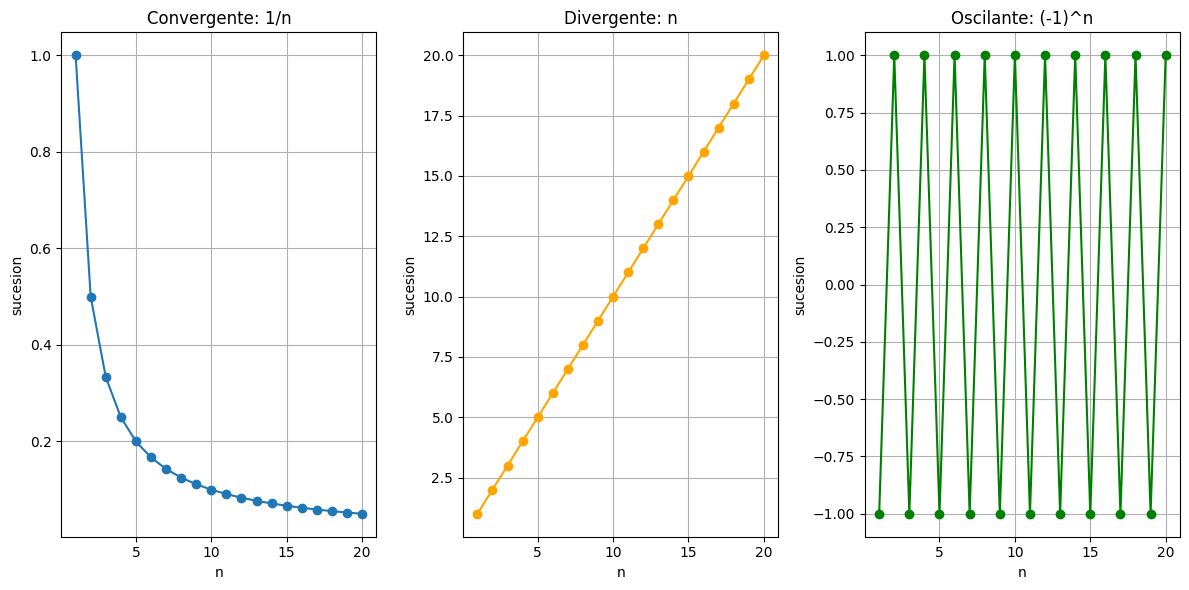

In [ ]:
import matplotlib.pyplot as plt # type: ignore

# Lista de n (del 1 al 20)
n = list(range(1, 21))

convergente = [1 / i for i in n]

divergente = n

oscilante = [(-1) ** i for i in n]

# Crear subplots
plt.figure(figsize=(12, 6))

# Convergente
plt.subplot(1, 3, 1)
plt.plot(n, convergente, marker='o')
plt.title("Convergente: 1/n")
plt.xlabel("n")
plt.ylabel("sucesion")
plt.grid(True)

# Divergente
plt.subplot(1, 3, 2)
plt.plot(n, divergente, marker='o', color='orange')
plt.title("Divergente: n")
plt.xlabel("n")
plt.ylabel("sucesion")
plt.grid(True)

# Oscilante
plt.subplot(1, 3, 3)
plt.plot(n, oscilante, marker='o', color='green')
plt.title("Oscilante: (-1)^n")
plt.xlabel("n")
plt.ylabel("sucesion")
plt.grid(True)

# Mostrar gráficos
plt.tight_layout()
plt.show()


## Criterios de parada

Son las condiciones que indican cuando debe detenerse un algoritmo.

* Error absoluto
* Error relativo
* Valor de la funcion 
* Numero de iteraciones
* Tiempo de ejecucion


In [ ]:
import math
import time

def punto_fijo_absoluto(g, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x_nueva = g(x)
        error_aboluto = abs(x_nueva - x)
        error_relativo = (abs((x_nueva - x)/x_nueva))
        print(f"Iteración {i+1}: x = {x_nueva:.10f}, Error Absoluto = {error_aboluto:.2e}")
        if error_aboluto < tol:
            break
        x = x_nueva
    return x_nueva

def punto_fijo_relativo(g, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x_nueva = g(x)
        error_relativo = (abs((x_nueva - x)/x_nueva))
        print(f"Iteración {i+1}: x = {x_nueva:.10f}, Error Relativo = {error_relativo:.2e}")
        if error_relativo < tol:
            break
        x = x_nueva
    return x_nueva

def punto_fijo_iteraciones(g, x0, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x_nueva = g(x)
        #error_relativo = (abs((x_nueva - x)/x_nueva))
        print(f"Iteración {i+1}: x = {x_nueva:.10f}")
    return x_nueva

def punto_fijo_tiempo(g, x0, max_iter=1000, tiempo_max = 1):
    x = x0
    inicio = time.time()
    for i in range(max_iter):
        x_nueva = g(x)
        #error_relativo = (abs((x_nueva - x)/x_nueva))
        print(f"Iteración {i+1}: x = {x_nueva:.10f}")
        fin = time.time()
        tiempo_total = fin - inicio
        if tiempo_total > tiempo_max:
            break
        x = x_nueva
        
    
    return x_nueva


def punto_fijo_tiempo(g, x0, max_iter=1000, tiempo_max=0.009):
    x = x0
    inicio = time.time()

    for i in range(max_iter):
        x_nueva = g(x)
        0
        print(f"Iteración {i+1}: x = {x_nueva:.10f}")

        # Verifica el tiempo transcurrido
        tiempo_actual = time.time()
        tiempo_total = tiempo_actual - inicio
        if tiempo_total > tiempo_max:
            print(f"Se detuvo por tiempo: {tiempo_total:.6f} segundos")
            break

        x = x_nueva

    else:
        # Si no se interrumpió por tiempo, imprimir tiempo total al terminar las iteraciones
        tiempo_total = time.time() - inicio
        print(f"Tiempo total de ejecución: {tiempo_total:.6f} segundos")

    return x_nueva

print(punto_fijo_tiempo(math.cos, 10))

Iteración 1: x = -0.8390715291
Iteración 2: x = 0.6681539175
Iteración 3: x = 0.7849667209
Iteración 4: x = 0.7074117913
Iteración 5: x = 0.7600464159
Iteración 6: x = 0.7248040330
Iteración 7: x = 0.7486293602
Iteración 8: x = 0.7326224625
Iteración 9: x = 0.7434230014
Iteración 10: x = 0.7361561485
Iteración 11: x = 0.7410549594
Iteración 12: x = 0.7377568015
Iteración 13: x = 0.7399792611
Iteración 14: x = 0.7384825426
Iteración 15: x = 0.7394909113
Iteración 16: x = 0.7388117354
Iteración 17: x = 0.7392692697
Iteración 18: x = 0.7389610842
Iteración 19: x = 0.7391686885
Iteración 20: x = 0.7390288468
Iteración 21: x = 0.7391230472
Iteración 22: x = 0.7390595933
Iteración 23: x = 0.7391023369
Iteración 24: x = 0.7390735445
Iteración 25: x = 0.7390929395
Iteración 26: x = 0.7390798748
Iteración 27: x = 0.7390886753
Iteración 28: x = 0.7390827472
Iteración 29: x = 0.7390867405
Iteración 30: x = 0.7390840506
Iteración 31: x = 0.7390858625
Iteración 32: x = 0.7390846420
Iteración 33: x 

## Raices de una ecuacion

La raiz x es la solucion de una ecuacion f de la forma:

$$ f(x) = 0 $$

## Teorema del valor intermedio

Si f pertenece a un intervalo [a, b] y K es cualquier numero entre f(a) y f(b), entonces existe un numero *c* en (a, b) para el cual f(c) = k. La funcion debe ser continua y no tener saltos en el intervalo seleccionado. 

![grafica_valor_intermedio](GraficaTeoremaValorIntermedio.png)

**Ejemplo**

Muestre que
$$ x^5-2x^3+3x^2-1=0 $$
tiene una solucion en el intervalo [0, 1]